<a href="https://colab.research.google.com/github/sims-022/Image-Classification/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/Flowers
%cp -av /content/images /content/drive/MyDrive/Flowers

/content/drive/MyDrive/Flowers
'/content/images' -> '/content/drive/MyDrive/Flowers/images'
'/content/images/pretty sunflower' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower'
'/content/images/pretty sunflower/Image_1.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_1.jpg'
'/content/images/pretty sunflower/Image_2.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_2.jpg'
'/content/images/pretty sunflower/Image_3.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_3.jpg'
'/content/images/pretty sunflower/Image_4.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_4.jpg'
'/content/images/pretty sunflower/Image_5.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_5.jpg'
'/content/images/pretty sunflower/Image_6.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sunflower/Image_6.jpg'
'/content/images/pretty sunflower/Image_7.jpg' -> '/content/drive/MyDrive/Flowers/images/pretty sun

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.wallpapers13.com/wp-content/uploads/2020/09/Sunflower-farm-field-yellow-flowers-beautiful-sunset--1680x1050.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://clickwallpapers.com/1080p/sunflower-widescreen-wallpaper-for-android-On-Wallpaper-1080p-HD.jpg
[!] Issue getting: http://clickwallpapers.com/1080p/sunflower-widescreen-wallpaper-for-android-On-Wallpaper-1080p-HD.jpg
[!] Error:: HTTP Error 522: Origin Connection Time-out
[%] Downloading Image #2 from http://www.prettydesigns.com/wp-content/uploads/2014/12/Blue-Flower-and-Skull-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/--ShcPhgDlI8/UfOJYMdoxMI/AAAAAAAAG_0/pkfkiw2YE88/s1600/beautiful+Sun+flower+(9).jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cukierniapielesiak.pl/wp-content/uploads/2017/01/tort-weselny-Kopiowanie.jpg
[%] File Downloaded !

[%] Downloading

In [ ]:
from bing_image_downloader import downloader
downloader.download("white rose",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://www.allabouthappylife.com/wallpaper/roses/white_roses/white_rose_wallpaper-dsc02034.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.fiftyflowers.com/site_files/FiftyFlowers/Image/Product/Classic_Rose_White_Boutonniere_Corsage_Wedding_Package_300.jpg
[!] Issue getting: http://www.fiftyflowers.com/site_files/FiftyFlowers/Image/Product/Classic_Rose_White_Boutonniere_Corsage_Wedding_Package_300.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from http://www.allabouthappylife.com/wallpaper/roses_2/white-rose-dsc00091.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.brucebriscoe.com/bali/images/artsy/flowers/PinkYellowRose.jpg
[!] Issue getting: http://www.brucebriscoe.com/bali/images/artsy/flowers/PinkYellowRose.jpg
[!] Error:: <urlopen error [Errno 110] Connection timed out>
[%] Downloading Image #3 from http://1.bp.blogspot.com/-sB3lK6VA

In [5]:
#Pre Processing 
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
DATADIR = '/content/images' 
CATEGORIES = ['pretty sunflower','white rose']
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
       img_array = imread(os.path.join(path,img))
       #print(img_array.shape)
       #plt.imshow(img_array)
       img_resized = resize(img_array,(150,150,3))
       flat_data.append(img_resized.flatten())
       images.append(img_resized)
       target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

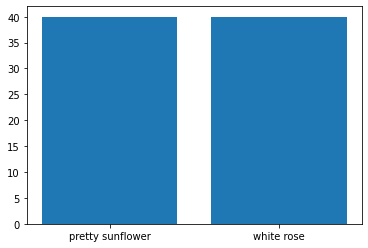

In [7]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1])

In [11]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1])

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
accuracy_score(y_pred,y_test)

0.9583333333333334

In [14]:
confusion_matrix(y_pred,y_test)

array([[12,  0],
       [ 1, 11]])

In [15]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [16]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://i.pinimg.com/originals/dd/95/f9/dd95f9fb2c492c6de4f8da9b59b1973d.jpg
(1709, 1200, 3)
PREDICTED OUTPUT: pretty sunflower


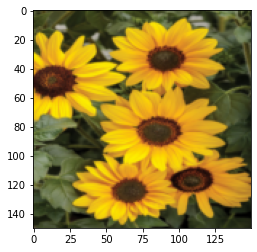

In [19]:
#Testing the model
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')